In [13]:
from __future__ import division, print_function

In [14]:
import requests, bs4
from bs4 import BeautifulSoup as bs
import pandas as pd
from time import sleep
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn import datasets, model_selection
from sklearn.linear_model import LogisticRegression
import pickle as pkl

In [15]:
url = 'https://www.baseball-reference.com/teams/{}/{}'
team_list = ['ATL', 'PHI', 'NYM', 'MIA', 'WSN', 'MIL', 'STL', 'CIN', 'CHC',
            'PIT', 'SFG', 'LAD', 'SDP', 'COL', 'ARI', 'TBR', 'NYY', 'BOS',
            'TOR', 'BAL', 'CHW', 'CLE', 'DET', 'KCR', 'MIN', 'HOU', 'SEA', 
            'OAK', 'LAA', 'TEX']
url_list = []

year_list = [*range(1998, 2022, 1)]
year_list = [str(x) for x in year_list]

for t in year_list:
    url = 'https://www.baseball-reference.com/teams//' + t + '.shtml'
    for i in team_list:


        ## MON to WSN
        if i == 'WSN' and int(t) < 2005:
            i = 'MON'
            
        ## TBD to TBR
        if i == 'TBR' and int(t) < 2008:
            i ='TBD'
        
        ## FLA to MIA
        if i == 'MIA' and int(t) < 2012:
            i = 'FLA'
        
        ## ANA to LAA
        if i == 'LAA' and int(t) < 2005:
            i = 'ANA'
            
        
        team_temp = url[:41] + i + url[41:]
        url_list.append(team_temp)

In [16]:
def delete_let(a, b):
    num_let = a.count(b)
    i = 0
    while i < num_let:
        a.remove(b)
        i += 1
    return a



In [17]:
player_list = []

age_f = []
game_played_f = []
pa_f = []
at_bat_f = []
runs_f = []
hits_f = []
doubles_f = []
homeruns_f = []
so_f = []
bb_f = []
ba_f = []
rbi_f = []


for u in url_list:
    soup = bs(requests.get(u).text)

    spex = soup.find('tbody')

    #age
    age_tag = spex.find_all(attrs = {'data-stat' : 'age'})
    age = [t.text for t in age_tag]
    delete_let(age, 'Age')
    age_f.extend(age)
#     print(age)


    #Game played
    game_played_tag = spex.find_all(attrs = {'data-stat' : 'G'})
    game_played = [t.text for t in game_played_tag]
    delete_let(game_played, 'G')
    game_played_f.extend(game_played)
#     print(game_played)

    #Plate Appearances
    pa_tag = spex.find_all(attrs = {'data-stat' : 'PA'})
    pa = [t.text for t in pa_tag]
    delete_let(pa, 'PA')
    pa_f.extend(pa)
#     print(pa)

    #At Bats
    at_bat_tag = spex.find_all(attrs = {'data-stat' : 'AB'})
    at_bat = [t.text for t in at_bat_tag]
    delete_let(at_bat, 'AB')
    at_bat_f.extend(at_bat)
#     print(at_bat)

    #Runs Scored
    runs_tag = spex.find_all(attrs = {'data-stat' : 'R'})
    runs = [t.text for t in runs_tag]
    delete_let(runs, 'R')
    runs_f.extend(runs)
#     # print(runs)

    #Hits
    hits_tag = spex.find_all(attrs = {'data-stat' : 'H'})
    hits = [t.text for t in hits_tag]
    delete_let(hits, 'H')
    hits_f.extend(hits)
#     # print(hits)

    #Doubles Hit
    doubles_tag = spex.find_all(attrs = {'data-stat' : '2B'})
    doubles = [t.text for t in doubles_tag]
    delete_let(doubles, '2B')
    doubles_f.extend(doubles)
#     # print(doubles)

    #Home Runs
    homeruns_tag = spex.find_all(attrs = {'data-stat' : 'HR'})
    homeruns = [t.text for t in homeruns_tag]
    delete_let(homeruns, 'HR')
    homeruns_f.extend(homeruns)
#     # print(homeruns)

    #Runs Batted In
    rbi_tag = spex.find_all(attrs = {'data-stat' : 'RBI'})
    rbi = [t.text for t in rbi_tag]
    delete_let(rbi, 'RBI')
    rbi_f.extend(rbi)
#     print(rbi)

    #Strikeouts
    so_tag = spex.find_all(attrs = {'data-stat' : 'SO'})
    so = [t.text for t in so_tag]
    delete_let(so, 'SO')
    so_f.extend(so)
#     # print(so)

    #Bases on Balls
    bb_tag = spex.find_all(attrs = {'data-stat' : 'BB'})
    bb = [t.text for t in bb_tag]
    delete_let(bb, 'BB')
    bb_f.extend(bb)
#     # print(bb)

    #Batting Averages - target
    batting_avg_tag = spex.find_all(attrs = {'data-stat' : 'batting_avg'})
    batting_avg = [t.text for t in batting_avg_tag]
    delete_let(batting_avg, 'BA')
    ba_f.extend(batting_avg)
#     print(batting_avg)


    


In [18]:
## Cleaning at_bat data to make it standard

for i in range(0, len(at_bat_f)):
    if at_bat_f[i] == '':
        at_bat_f[i] = 'n/a'

In [19]:
mlb_df = pd.DataFrame(list(zip(age_f, game_played_f, pa_f, at_bat_f, 
                              runs_f, hits_f, doubles_f, homeruns_f, rbi_f,
                              so_f, bb_f, ba_f)), 
                      columns = ['Age', 'Game_Played', 'PA', 'At_Bat',
                                'Run', 'Hit', 'Double', 'Homerun', 'RBI',
                                'SO', 'BB', 'BA'])

In [20]:
mlb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33831 entries, 0 to 33830
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          33831 non-null  object
 1   Game_Played  33831 non-null  object
 2   PA           33831 non-null  object
 3   At_Bat       33831 non-null  object
 4   Run          33831 non-null  object
 5   Hit          33831 non-null  object
 6   Double       33831 non-null  object
 7   Homerun      33831 non-null  object
 8   RBI          33831 non-null  object
 9   SO           33831 non-null  object
 10  BB           33831 non-null  object
 11  BA           33831 non-null  object
dtypes: object(12)
memory usage: 3.1+ MB


In [21]:
#data cleaning

mlb_df['At_Bat']
mlb_df = mlb_df.loc[mlb_df['At_Bat'] != 'n/a']

mlb_df['At_Bat'] = mlb_df['At_Bat'].astype(int)

mlb_df = mlb_df.loc[mlb_df['At_Bat'] >= 162]

In [10]:
mlb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 33792
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          8562 non-null   object
 1   Game_Played  8562 non-null   object
 2   PA           8562 non-null   object
 3   At_Bat       8562 non-null   int64 
 4   Run          8562 non-null   object
 5   Hit          8562 non-null   object
 6   Double       8562 non-null   object
 7   Homerun      8562 non-null   object
 8   RBI          8562 non-null   object
 9   SO           8562 non-null   object
 10  BB           8562 non-null   object
 11  BA           8562 non-null   object
dtypes: int64(1), object(11)
memory usage: 869.6+ KB


In [22]:
#Changing data typep of each columns

mlb_df['Age'] = mlb_df['Age'].astype(int)
mlb_df['Game_Played'] = mlb_df['Game_Played'].astype(int)
mlb_df['PA'] = mlb_df['PA'].astype(int)
mlb_df['Run'] = mlb_df['Run'].astype(int)
mlb_df['Hit'] = mlb_df['Hit'].astype(int)
mlb_df['Double'] = mlb_df['Double'].astype(int)
mlb_df['Homerun'] = mlb_df['Homerun'].astype(int)
mlb_df['RBI'] = mlb_df['RBI'].astype(int)
mlb_df['SO'] = mlb_df['SO'].astype(int)
mlb_df['BB'] = mlb_df['BB'].astype(int)
mlb_df['BA'] = mlb_df['BA'].astype(float)

array([[<AxesSubplot:title={'center':'At_Bat'}>]], dtype=object)

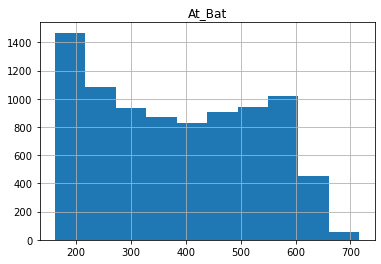

In [23]:
mlb_df.hist(column = ['At_Bat'])

In [24]:
X = mlb_df.drop(columns = 'BA')
y = mlb_df['BA']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

In [25]:
lr_model.predict(X_test)

NameError: name 'lr_model' is not defined

In [26]:
y_test

20049    0.232
15193    0.218
8350     0.318
22719    0.282
3873     0.279
         ...  
1069     0.253
30612    0.288
5550     0.288
27778    0.223
20194    0.194
Name: BA, Length: 2141, dtype: float64

In [12]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
print(f"""
train score: {lr_model.score(X_train, y_train):%}
test score: {lr_model.score(X_test, y_test):%}
""")


train score: 86.549775%
test score: 86.747359%



In [17]:
mlb_df.head(50)

,Age,Game_Played,PA,At_Bat,Run,Hit,Double,Homerun,RBI,SO,BB,BA
0,27,133,534,489,73,139,21,34,106,85,30,0.284
1,37,153,648,555,103,169,27,44,121,146,63,0.305
2,33,109,401,366,50,94,21,9,37,37,29,0.257
3,34,96,424,347,64,97,18,0,27,53,59,0.280
4,26,160,707,601,123,188,29,34,107,93,96,0.313
5,27,129,491,427,69,117,29,18,70,66,56,0.274
6,21,159,631,582,89,158,33,31,90,129,40,0.271
7,27,130,469,414,54,101,27,13,46,112,49,0.244
8,26,105,317,289,32,61,14,5,22,68,24,0.211
9,34,83,295,264,35,73,15,1,22,25,24,0.277


In [64]:
# with open("./project_pkl.pkl", "wb") as f:
#     pkl.dump(lr_model, f)

In [14]:
with open("./X_test.pkl", "wb") as f:
    pkl.dump(X_test, f)

In [15]:
with open("./y_test.pkl", "wb") as f:
    pkl.dump(y_test, f)